## Loading Library

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [48]:
#1
bread_basket = pd.read_csv('https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv')
bread_basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [49]:
#2 info
bread_basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
#3 check missing values
bread_basket.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-51-ffe145e95698>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  bread_basket['date_time'] = pd.to_datetime(bread_basket['date_time'])


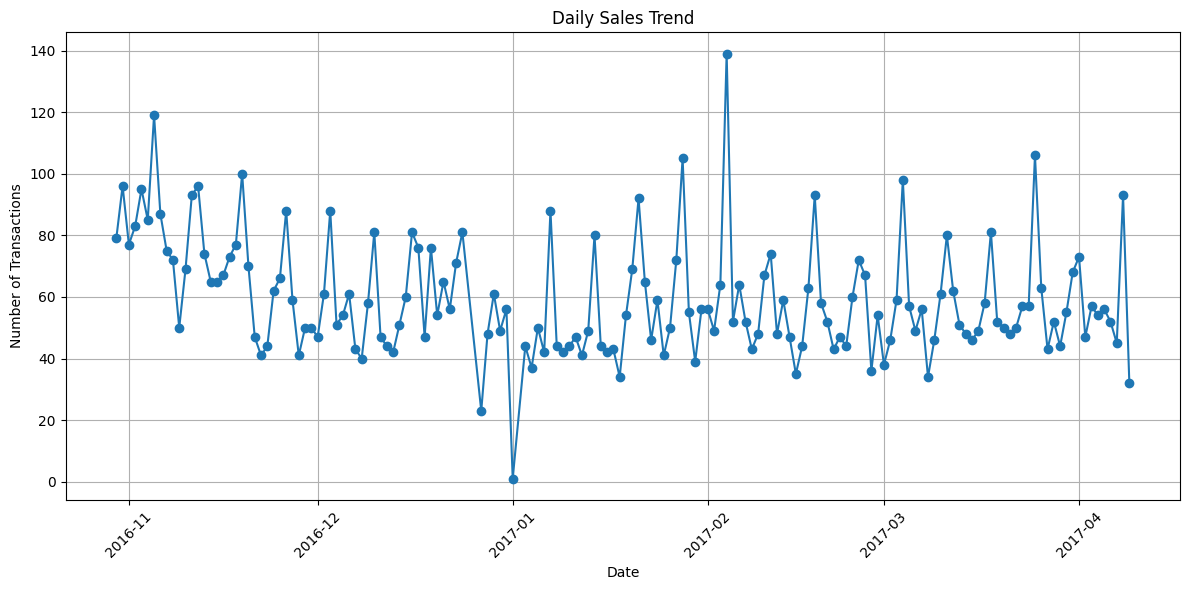

In [51]:
bread_basket['date_time'] = pd.to_datetime(bread_basket['date_time'])

# Extract the date part from date_time
bread_basket['Date'] = bread_basket['date_time'].dt.date

# Group by date and count the number of transactions
daily_sales = bread_basket.groupby('Date')['Transaction'].nunique()

# Plot the daily sales trend
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, marker='o')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [52]:
# 6
bread_basket['day'] = bread_basket['date_time'].dt.day
bread_basket['month'] = bread_basket['date_time'].dt.month
bread_basket['year'] = bread_basket['date_time'].dt.year
bread_basket['time'] = bread_basket['date_time'].dt.time
bread_basket['hour'] = bread_basket['date_time'].dt.hour
bread_basket['day_name'] = bread_basket['date_time'].dt.day_name()

# Display a sample of the modified DataFrame
bread_basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,Date,day,month,year,time,hour,day_name
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,30,10,2016,09:58:00,9,Sunday
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,30,10,2016,10:05:00,10,Sunday
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,30,10,2016,10:05:00,10,Sunday
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,30,10,2016,10:07:00,10,Sunday
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,30,10,2016,10:07:00,10,Sunday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


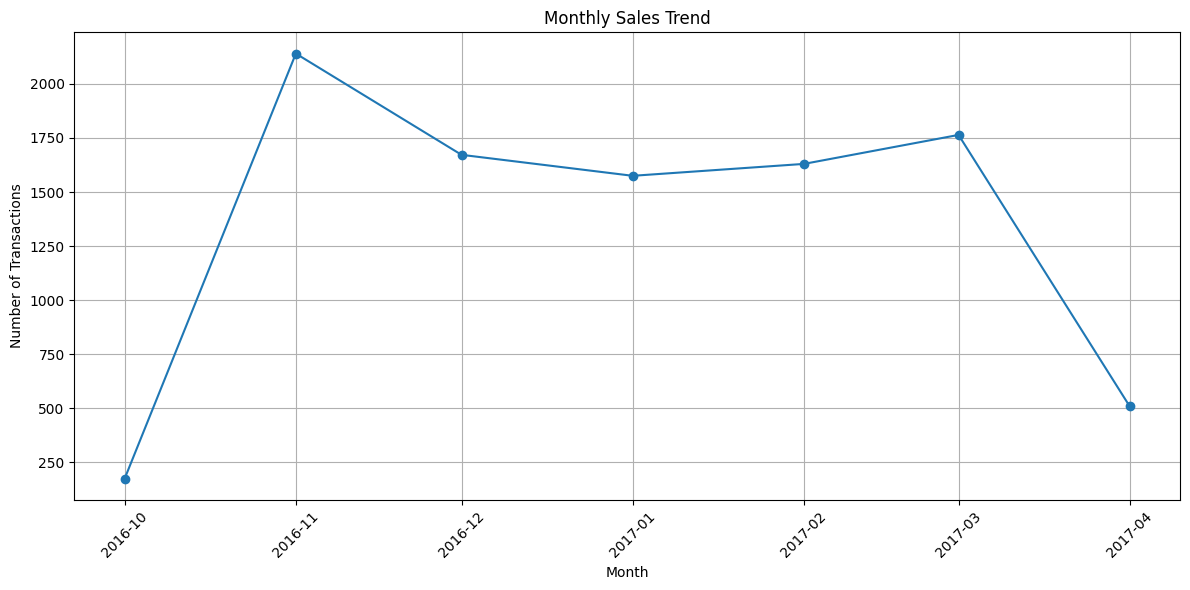

In [53]:
# 7
monthly_sales = bread_basket.groupby(['year', 'month'])['Transaction'].nunique().reset_index()

# Create a 'Year-Month' column for better plotting
monthly_sales['Year-Month'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

# Plotting the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year-Month'], monthly_sales['Transaction'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [54]:
#9
weekday_names = bread_basket.loc[bread_basket['weekday_weekend'] == 'weekday', 'day_name'].unique()
weekend_names = bread_basket.loc[bread_basket['weekday_weekend'] == 'weekend', 'day_name'].unique()

# Display unique weekday and weekend names
print(f"Unique weekday names: {weekday_names}")
print(f"Unique weekend names: {weekend_names}")

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [55]:
#10
pivot_table = df.pivot_table(
    index='month',
    columns='day_name',
    values='Transaction',
    aggfunc='count',
    fill_value=0
)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table[day_order]

pivot_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


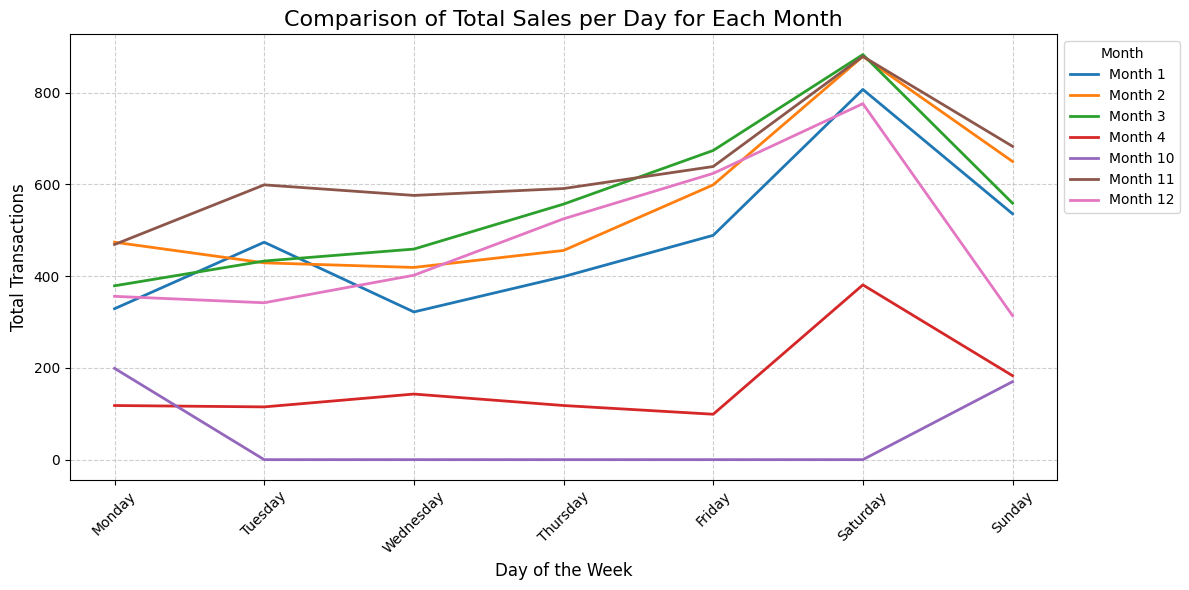

In [56]:
# 12
pivot_table_t = pivot_table.T

plt.figure(figsize=(12, 6))

for month in pivot_table_t.columns:
    plt.plot(pivot_table_t.index, pivot_table_t[month], label=f'Month {month}', linewidth=2, markersize=6)

plt.title('Comparison of Total Sales per Day for Each Month', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [57]:
# 14
unique_periods = bread_basket['period_day'].unique()

# Print the unique values
print(unique_periods)


['morning' 'afternoon' 'evening' 'night']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [58]:
# 15
morning_hours = bread_basket[bread_basket['period_day'] == 'morning']['hour'].unique()
afternoon_hours = bread_basket[bread_basket['period_day'] == 'afternoon']['hour'].unique()
evening_hours = bread_basket[bread_basket['period_day'] == 'evening']['hour'].unique()
night_hours = bread_basket[bread_basket['period_day'] == 'night']['hour'].unique()

# Print the unique hours for each period
print("Unique morning_hour:", morning_hours)
print("Unique afternoon_hour:", afternoon_hours)
print("Unique evening_hour:", evening_hours)
print("Unique night_hour:", night_hours)


Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


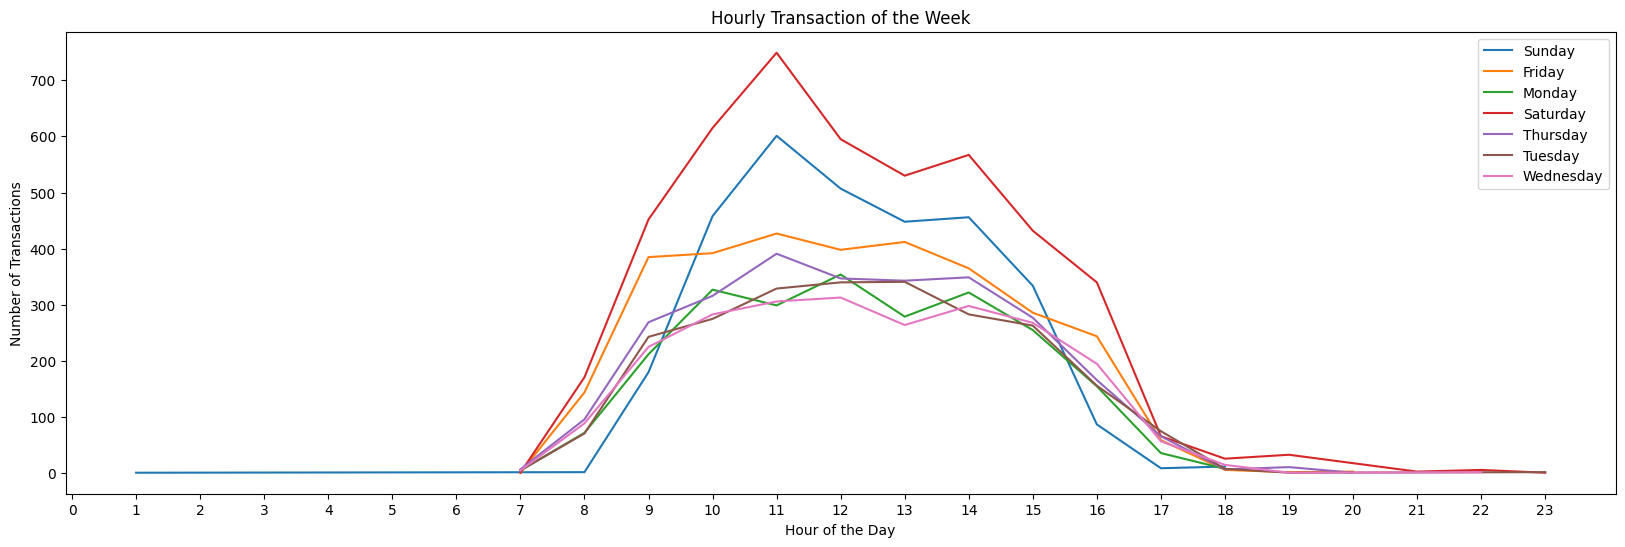

In [59]:
# 17
hourly_transactions = bread_basket.groupby(['day_name', 'hour'])['Transaction'].count().reset_index()

# Filter for the specified days (Sunday to Wednesday)
days_to_show = ['Sunday', 'Friday', 'Monday', 'Saturday', 'Thursday','Tuesday', 'Wednesday',]
filtered_transactions = hourly_transactions[hourly_transactions['day_name'].isin(days_to_show)]

# Create the line chart
plt.figure(figsize=(20, 6))
for day in days_to_show:
    day_data = filtered_transactions[filtered_transactions['day_name'] == day]
    plt.plot(day_data['hour'], day_data['Transaction'], label=day)

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Hourly Transaction of the Week')
plt.legend()
plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
plt.show()

18. The daily sales trend plot reveals that _______

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


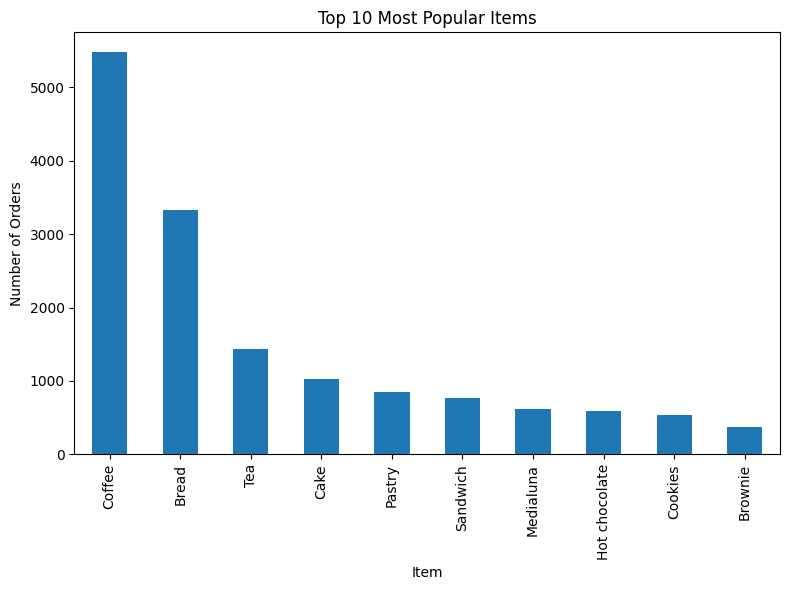

In [60]:
# 19
item_frequency = bread_basket.groupby('Item')['Transaction'].count().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
item_frequency.head(10).plot(kind='bar')

plt.xlabel('Item')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Popular Items')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-61-c05dee9f02bf>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_items_by_period = item_counts_by_period.groupby('period_day').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


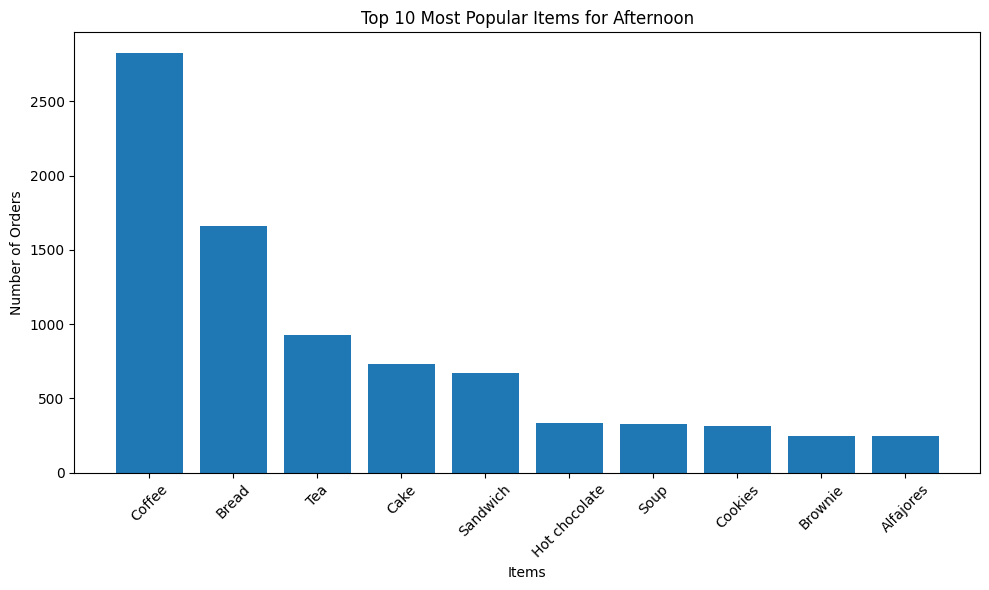

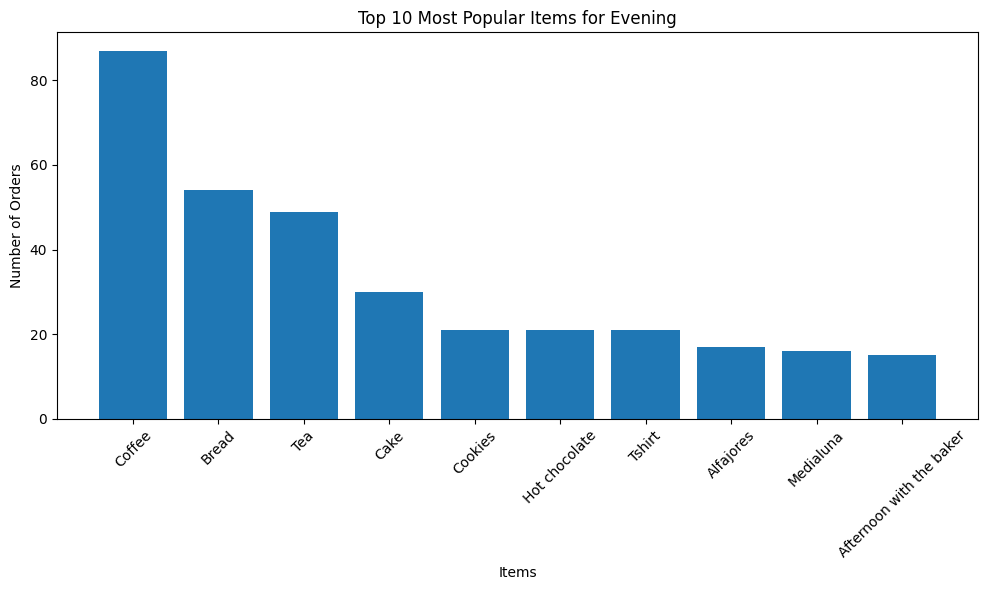

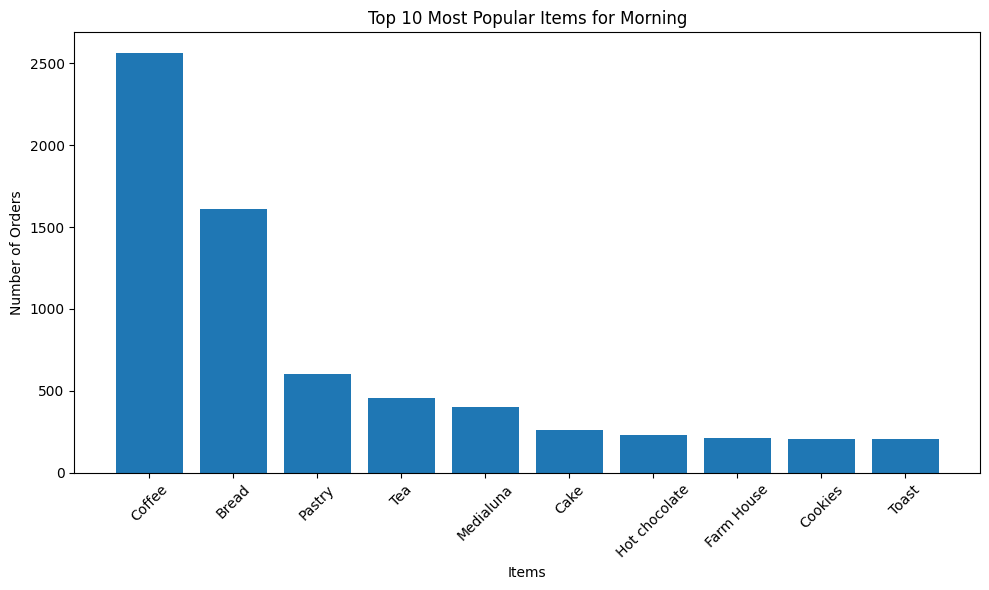

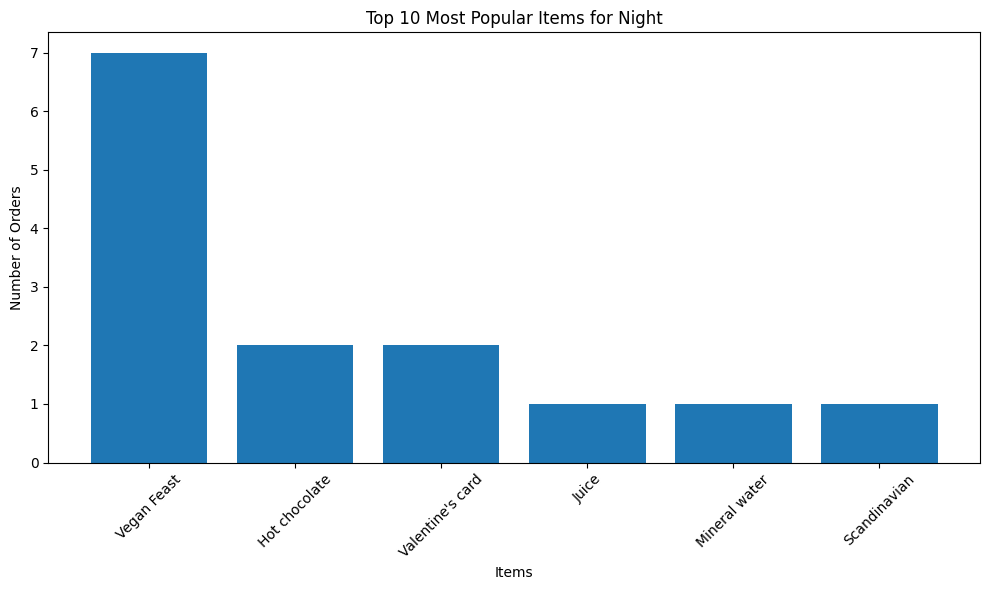

In [61]:
# 20
item_counts_by_period = bread_basket.groupby(['period_day', 'Item']).size().reset_index(name='count')

top_items_by_period = item_counts_by_period.groupby('period_day').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

periods = top_items_by_period['period_day'].unique()

for period in periods:
    data = top_items_by_period[top_items_by_period['period_day'] == period]

    plt.figure(figsize=(10, 6))

    plt.bar(data['Item'], data['count'])

    plt.xlabel('Items')
    plt.ylabel('Number of Orders')
    plt.title(f'Top 10 Most Popular Items for {period.capitalize()}')

    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

21. It turns out that there is something different in the plot above, the insight is ____


I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-62-d6d2f1c824df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Valentine_sales['date'] = pd.to_datetime(Valentine_sales['date_time']).dt.date


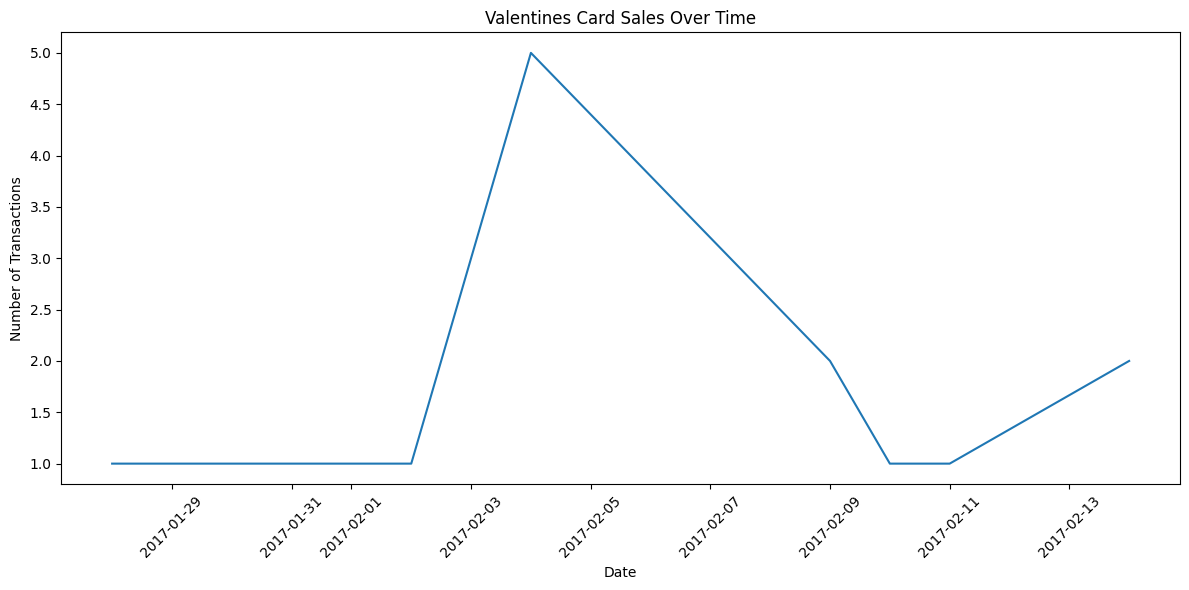

In [62]:
#22
Valentine_sales = bread_basket[bread_basket['Item'].str.contains('Valentine', case=False, na=False)]

Valentine_sales['date'] = pd.to_datetime(Valentine_sales['date_time']).dt.date
sales_by_date = Valentine_sales.groupby('date').size()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, linestyle='-', label='Valentine Card Sales')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Valentines Card Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


23. I found the insight from the sale of the Valentine's cards above is ____


## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [63]:
# 24

# Create a list of transactions
from mlxtend.preprocessing import TransactionEncoder
transactions = []
for transaction_id, group in bread_basket.groupby('Transaction'):
    item_list = group['Item'].tolist()
    transactions.append(item_list)

# Create a TransactionEncoder object
te = TransactionEncoder()

# Fit the encoder to the transactions
te_ary = te.fit(transactions).transform(transactions)

# Create a DataFrame from the encoded transactions
apriori_df = pd.DataFrame(te_ary, columns=te.columns_)

# Set Transaction as index using a list
apriori_df = apriori_df.set_index(pd.Index(list(bread_basket.groupby('Transaction').groups.keys()), name='Transaction'))

# Display the DataFrame
apriori_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
#25

# Convert quantities to 1 and 0
basket_encoded = apriori_df.applymap(lambda x: 1 if x else 0)
basket_encoded.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-64-a9851f53db6d>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_df.applymap(lambda x: 1 if x else 0)


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [65]:
# 26
from mlxtend.frequent_patterns import apriori

# Apply Apriori algorithm
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Display frequent itemsets
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [67]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
1,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
7,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



An examination of The Bread Basket dataset reveals several valuable insights that can help optimize both operations and customer experience. Sales consistently increase on weekends, with November and February being particularly strong months. Peak sales times are typically observed between 10 AM and 12 PM. Coffee stands out as the most popular item, followed by bread, tea, and cake. While coffee remains a steady favorite, pastries are more commonly purchased in the morning, and sandwiches are favored in the afternoon.

The surge in Valentine's card sales around February 14th presents an opportunity to leverage seasonal promotions. Additionally, coffee is often bought alongside items such as toast, medialuna, pastries, juice, and sandwiches, which could inspire bundled offer strategies. The strong correlation between bread and pastry purchases highlights the potential for cross-selling initiatives.

Based on these insights, The Bread Basket could benefit from adjusting staffing levels and managing inventory more efficiently during peak hours and weekends. Furthermore, seasonal trends should be incorporated into promotional strategies, with emphasis on popular items and product pairings. These data-driven strategies will not only improve operational efficiency but also enhance profitability and customer satisfaction. A deeper analysis, potentially incorporating customer demographics, could provide additional opportunities for personalized marketing and tailored offerings.

Frequent Itemsets:
Most Popular Individual Items:

Coffee stands out as the top choice, making up 47.8% of purchases, followed by Bread at 32.7%, Tea at 14.3%, Cake at 10.4%, and Pastry at 8.6%.

Top Item Combinations:

The most frequent item pairings include Coffee & Bread (9.0%), Coffee & Cake (5.5%), and Coffee & Tea (5.0%).

Noteworthy Association Rules:

(Cake → Tea): Customers who buy Cake are 1.6 times more likely to also purchase Tea (Lift: 1.60).

(Toast → Coffee): Toast and Coffee have a strong connection, with a confidence level of 70.4% and a lift of 1.47.

(Coffee → Pastry): Coffee buyers often purchase Pastry, with a lift of 1.15.

Strategic Recommendations:
Consider promoting popular breakfast combinations such as Coffee & Cake or Toast & Coffee to boost sales.

To increase cross-sales, position Coffee near complementary items like Bread and Pastry to encourage more bundling.

